In [5]:
import matplotlib.pyplot as plt
from aim import Run
import os
from src.utils.ProjectConfiguration import ProjectConfiguration as pc
from aim.storage.context import Context
import pandas as pd
import seaborn as sns

In [6]:
configs = {
    "Prostate":{
        #"M3D-NCA": {
        #    "run_hash": '56124a65055f4944b9dd1943',
        #    "exp_name": 'prostate_m3d_fast'
        #},
        "OctreeNCA": {
            "run_hash": 'b9acd5a0015e46d08cdbea4d',
            "exp_name": 'prostatefAbl_none_10_1.0_16_1_1.0'
        },
        "OctreeNCA-BN": {
            "run_hash": '2ee3dc7174dc4370a652e340',
            "exp_name": 'prostatefAbl_batch_10_1.0_16_3_1.0'
        },
        "OctreeNCA-LN": {
            "run_hash": '5682d444c2ea4cd49b77c5f0',
            "exp_name": 'prostatefAbl_group_10_1.0_16_3_1.0'
        }
    },
    "Peso":{# Does not work!!!
        "M3D-NCA": {
            "run_hash": '913f3a0ad5a24443ad2bf7d5',
            "exp_name": 'peso_med_OctreeNCA2DSegmentation'
        },
        "OctreeNCA": {
            "run_hash": '8054a345fd2e42b9ba16a809',
            "exp_name": 'cholecfAbl_none_10_1.0_16_3_1.0_0.99'
        }
    },
    "Cholec":{
        #"M3D-NCA": {
        #    "run_hash": 'f3d058591ef1403296c96f9f',
        #    "exp_name": 'cholec'
        #},
        "OctreeNCA": {
            "run_hash": '8054a345fd2e42b9ba16a809',
            "exp_name": 'cholecfAbl_none_10_1.0_16_3_1.0_0.99'
        },
        #"OctreeNCA": {
        #    "run_hash": 'a389bc1d54004f328d017483',
        #    "exp_name": 'cholecfFixAbl_none_10_1.0_16_1_1.0_0.99'
        #},
        "OctreeNCA-BN": {
            "run_hash": 'b34a32c0e4564aa18118f21b',
            "exp_name": 'cholecfFixAbl_batch_10_1.0_16_3_1.0_0.99'
        },
        "OctreeNCA-LN": {
            "run_hash": 'b5f73bbbd8aa4b1bb10a1b0f',
            "exp_name": 'cholecfFixAbl_group_10_1.0_16_3_1.0_0.99'
        }
    }
}
metrics = {
    "Prostate": "test/DiceScore/0",
    "Peso": "DiceScore",
    #"Cholec": "test/DiceScore/1"
    "Cholec": ["test/DiceScore/0", "test/DiceScore/1", "test/DiceScore/2", "test/DiceScore/3", "test/DiceScore/4"]
}


TASK = "Prostate"

df = []
for model in configs[TASK].keys():
    run_hash = configs[TASK][model]["run_hash"]
    exp_name = configs[TASK][model]["exp_name"]
    # Load a run
    run = Run(run_hash=run_hash, 
                    experiment=exp_name, repo=os.path.join(pc.FILER_BASE_PATH, pc.STUDY_PATH, 'Aim'),
                    read_only=True)
    if isinstance(metrics[TASK], list):
        for m in metrics[TASK]:
            metric_data = run.get_metric(m, context=Context({}))
            model_df = metric_data.dataframe()
            model_df['value'] = model_df['value'] * 100
            model_df['model'] = model
            df.append(model_df)
    else:
        metric_data = run.get_metric(metrics[TASK], context=Context({}))
        model_df = metric_data.dataframe()
        model_df['value'] = model_df['value'] * 100
        model_df['model'] = model
        df.append(model_df)

df = pd.concat(df)

In [7]:
octree = (221 /255, 30/255, 42/255)
m3d = (176 /255, 60/255, 168/255)
unet = (255 /255, 160/255, 0/255)
segformer = (119 /255, 151/255, 240/255)
transunet = (53 /255, 221/255, 77/255)
sam = (51 /255, 125/255, 86/255)

named_colors = {
    "OctreeNCA": octree,
    "M3D-NCA": m3d,
    "Med-NCA": m3d,

    "UNet": unet,
    "TransUNet": transunet,
    "SegFormer": segformer,
    "SAM": sam,

    "OctreeNCA-BN": unet,
    "OctreeNCA-LN": segformer,
}

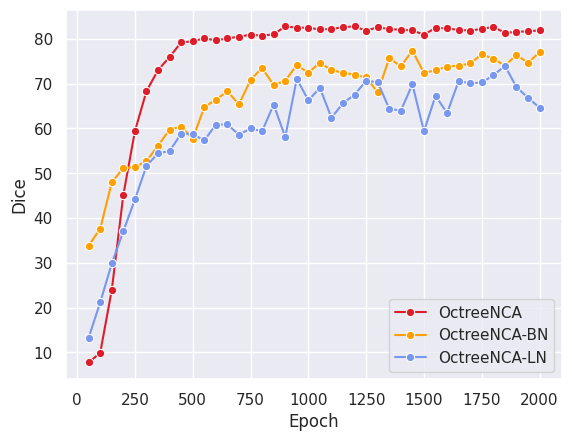

In [11]:
sns.set_theme(style='darkgrid')
sns.lineplot(data=df, x='step', y='value', hue='model', marker='o', errorbar=None, palette=named_colors)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Dice')

plt.savefig("figures/convergence_prostate.pdf", bbox_inches='tight')